# Example 2 - Relaxation oscillations in CW fiber laser

In this example, we simulate a CW fiber laser from the moment the pump is turned on until the laser reaches its steady state. In between, the laser undergoes relaxation oscillations.

### Imports

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from pyfiberamp.dynamic import DynamicSimulation
from pyfiberamp.fibers import YbDopedFiber

### 1) Creating the fiber (1 m long, 6 um, core-pumped, same as in example 1)

In [2]:
length = 1
core_radius = 3e-6
core_na = 0.12
yb_number_density = 1e25
background_loss = 0

yb_fiber = YbDopedFiber(length=length,
                        core_radius=core_radius,
                        core_na=core_na,
                        ion_number_density=yb_number_density,
                        background_loss=background_loss)

### 2) Setting the other simulation parameters

We use the same pump and signal/laser wavelengths and the same pump power as in the first example. This time, a finite linewidth must be specified because the laser is seeded by spontaneous emission. The cavity is thought to be formed of the active fiber and two FBGs or mirrors with reflectances of 0.9 and 1.

In reality, the wavelength and linewidth of the laser are defined by the wavelength-selective component in the cavity,
such as the FBG. PyFiberAmp cannot simulate a free-running laser without wavelength-selection because such a laser would typically lase with multiple peaks and thus require an inhomogeneous gain model. Fortunately, such an unstable laser is not wanted for any applications anyway.

In [3]:
pump_wavelength = 976e-9
laser_wavelength = 1030e-9  
laser_linewidth = 1e-9 
pump_power = 0.2

right_end_reflectance = 0.9
left_end_reflectance = 1.0

spatial_nodes = 100
time_steps = 2000000

### 3) Setting up and running the simulation

For this laser simulation, we define a single pump channel and two signal (laser) channels. The reflective boundary conditions are defined by setting the label, reflection_target, and reflectance parameters for the laser channels. The forward-propagating channel is labeled as "forward_channel" (could be anything) and the backward-propagating channel as "backward_channel". The reflection_target parameter is the label of the channel the reflection goes to and the reflectance [0,1] specifies the fraction of power reflected. The laser channels' input powers are set to zero. 

In [4]:
simulation = DynamicSimulation(max_time_steps=time_steps, fiber=yb_fiber)
simulation.add_forward_pump(wl=pump_wavelength,
                            input_power=pump_power)
simulation.add_forward_signal(wl=laser_wavelength,
                              wl_bandwidth=laser_linewidth,
                              input_power=0.0, 
                              channel_id='forward_channel',
                              reflection_target_id='backward_channel',
                              reflectance=right_end_reflectance)
simulation.add_backward_signal(wl=laser_wavelength,
                               wl_bandwidth=laser_linewidth,
                               input_power=0.0,
                               channel_id='backward_channel',
                               reflection_target_id='forward_channel',
                               reflectance=left_end_reflectance)
res = simulation.run(spatial_nodes)

### 4) Plotting the output power vs. time

We want plot the output power of the laser after the pump has been turned on. There is a ready function for it and we can even select the channels we want to plot. This time we only want to plot the forward signal channel because the backward signal channel has a reflectance of 1 so its output is zero and the pump channel is uninteresting. Note that I have selected enough time steps by trial and error so that we can see the laser settling into its steady state after the relaxation oscillations.

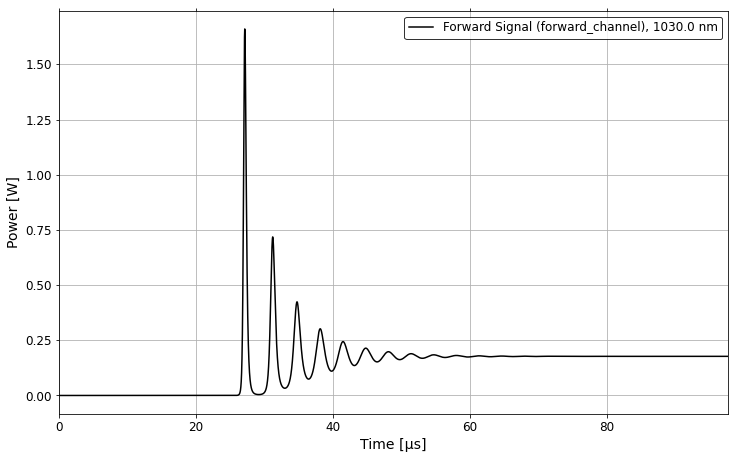

In [6]:
res.plot_outputs(channel_ids=['forward_channel'])

We can see strong relaxation oscillations as expected. At first, we get no output but the inversion is building up in the fiber. There are few photons to deplete the inversion, which reaches a value much above its steady state level. This energy is subsequently extracted by the first laser spike. After the spike, more photons are left in the cavity so the next spike is less intense. Slowly, the laser reaches its steady state output power of 180 mW.

If we would increase the losses in the cavity by adding background loss in the fiber or by increasing the output coupling, the relaxation oscillations would last longer. By adding even more losses, we would eventually find the point were the gain in the fiber is too small to offset the loss and the laser would not start at all. You can easily try to vary the losses yourself.

### 5) Plotting the final (steady) state of the laser

We can also plot the steady state of the laser cavity.

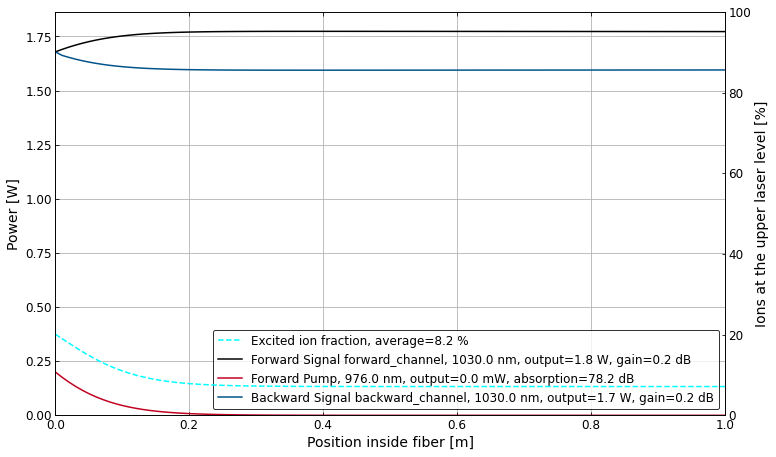

In [7]:
res.plot_power_evolution()

The losses in this idealised cavity consist only of the 10 % output coupling. This is roughly 0.4 dB, which is also the total gain of the laser in one round trip (0.2 dB + 0.2 dB). The signal power at the output mirror is 1.8 W, so the output power is 0.18 W, which can be seen in the figure with the relaxation oscillations.

If you want to ask a question or send feedback about this example, please open a new issue on GitHub or contact me at <pyfiberamp@gmail.com>.